# Distinguishing galaxy type using parameters like wavelength , Concentration or Luminosity profile ,eccentricity and colour indices using SDSS and Galaxy Zoo data for 780 Galaxies

In [ ]:
import numpy as np

def splitdata_train_test(data, fraction_training):
  # complete this function
  np.random.shuffle(data)
  split_index = int(fraction_training*len(data))
  return data[:split_index], data[split_index:]

if __name__ == "__main__":
  data = np.load('galaxy_catalogue.npy')

  # set the fraction of data which should be in the training set
  fraction_training = 0.7

  # split the data using your function
  training, testing = splitdata_train_test(data, fraction_training)

  # print the key values
  print('Number data galaxies:', len(data))
  print('Train fraction:', fraction_training)
  print('Number of galaxies in training set:', len(training))
  print('Number of galaxies in testing set:', len(testing))

In [2]:
import numpy as np

def splitdata_train_test(data, fraction_training):
  # complete this function
  np.random.shuffle(data)
  split_index = int(fraction_training*len(data))
  return data[:split_index], data[split_index:]

if __name__ == "__main__":
  data = np.load('galaxy_catalogue.npy')

  # set the fraction of data which should be in the training set
  fraction_training = 0.7

  # split the data using your function
  training, testing = splitdata_train_test(data, fraction_training)

  # print the key values
  print('Number data galaxies:', len(data))
  print('Train fraction:', fraction_training)
  print('Number of galaxies in training set:', len(training))
  print('Number of galaxies in testing set:', len(testing))

Number data galaxies: 780
Train fraction: 0.7
Number of galaxies in training set: 546
Number of galaxies in testing set: 234


In [3]:
import numpy as np
data = np.load('galaxy_catalogue.npy')

In [4]:
data[0]['u-g']

1.8576499999999996

In [5]:
import numpy as np
data = np.load('galaxy_catalogue.npy')
for name, value in zip(data.dtype.names, data[0]):
  print('{:10} {:.6}'.format(name, value))

u-g        1.85765
g-r        0.67158
r-i        0.4231
i-z        0.3061
ecc        0.585428
m4_u       2.25195
m4_g       2.33985
m4_r       2.38065
m4_i       2.35974
m4_z       2.39553
petroR50_u 3.09512
petroR50_r 3.81892
petroR50_z 3.82623
petroR90_u 5.17481
petroR90_r 8.26301
petroR90_z 11.4773
class      merger


In [6]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

def splitdata_train_test(data, fraction_training):
  np.random.seed(0)
  np.random.shuffle(data)
  split = int(len(data) * fraction_training)
  training_set = data[:split]
  testing_set = data[split :]
  return (training_set, testing_set)

def generate_features_targets(data):
  targets = data['class']
  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g']
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']
  features[:, 10] = data['petroR50_u']/data['petroR90_u']
  features[:, 11] = data['petroR50_r']/data['petroR90_r']
  features[:, 12] = data['petroR50_z']/data['petroR90_z']
  return features, targets

def dtc_predict_actual(data):
  training, testing = splitdata_train_test(data, 0.7)
  train_features, train_targets = generate_features_targets(training)
  test_features, test_targets = generate_features_targets(testing)
  dtc = DecisionTreeClassifier()
  dtc.fit(train_features, train_targets)
  predictions = dtc.predict(test_features)
  return (predictions, test_targets)



if __name__ == '__main__':
  data = np.load('galaxy_catalogue.npy')
    
  predicted_class, actual_class = dtc_predict_actual(data)

  # Print some of the initial results
  print("Some initial results...\n   predicted,  actual")
  for i in range(10):
    print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))

Some initial results...
   predicted,  actual
0. merger, merger
1. merger, merger
2. elliptical, elliptical
3. elliptical, elliptical
4. spiral, spiral
5. merger, spiral
6. merger, spiral
7. merger, spiral
8. merger, merger
9. merger, merger


In [7]:
data['u-g']


array([ 1.60844,  2.06669,  1.31461,  2.45772,  2.07598,  2.00626,
        1.73236,  1.80222,  0.86042,  1.14089,  1.47878,  1.86932,
        1.18627,  1.28853,  1.82892,  1.47451,  1.98442,  1.90255,
        1.6811 ,  1.90579,  1.79695,  1.54299,  1.74904,  1.62334,
        1.39331,  1.25031,  1.33324,  1.53427,  1.4784 ,  1.47586,
        1.90809,  1.99258,  1.42343,  1.58242,  1.90908,  1.94417,
        1.84256,  2.03694,  1.14477,  0.80427,  2.17441,  1.18423,
        1.9575 ,  1.39701,  1.86894,  1.56721,  1.21249,  1.94646,
        2.03924,  0.90043,  1.91867,  1.9332 ,  1.92719,  1.29274,
        1.9629 ,  1.82734,  2.00618,  0.79974,  1.32727,  2.13106,
        1.74259,  1.94469,  2.06552,  1.36398,  1.4062 ,  1.78496,
        1.91514,  1.94276,  1.8527 ,  1.84882,  1.83376,  1.03384,
        1.46197,  2.00159,  1.56972,  1.20485,  1.21816,  1.4801 ,
        1.56782,  1.81673,  1.76537,  1.49219,  1.3145 ,  1.54275,
        1.30116,  1.78573,  1.41733,  1.4721 ,  1.55892,  2.02

In [8]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


# splitting the train and test set

In [9]:
import numpy as np

def splitdata_train_test(data, fraction_training):
  # complete this function
  np.random.shuffle(data)
  split_index = int(fraction_training*len(data))
  return data[:split_index], data[split_index:]

if __name__ == "__main__":
  data = np.load('galaxy_catalogue.npy')

  # set the fraction of data which should be in the training set
  fraction_training = 0.7

  # split the data using your function
  training, testing = splitdata_train_test(data, fraction_training)

  # print the key values
  print('Number data galaxies:', len(data))
  print('Train fraction:', fraction_training)
  print('Number of galaxies in training set:', len(training))
  print('Number of galaxies in testing set:', len(testing))

Number data galaxies: 780
Train fraction: 0.7
Number of galaxies in training set: 546
Number of galaxies in testing set: 234


In [10]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier


# copy your splitdata_train_test function here
def splitdata_train_test(data, fraction_training):
  np.random.seed(0)
  np.random.shuffle(data)  
  split = int(len(data)*fraction_training)
  return data[:split], data[split:]

# copy your generate_features_targets function here
def generate_features_targets(data):
  # complete the function by calculating the concentrations

  targets = data['class']

  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g'] + 1
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']

  # fill the remaining 3 columns with concentrations in the u, r and z filters
  # concentration in u filter
  features[:, 10] = data['petroR50_u']/data['petroR90_u']
  # concentration in r filter
  features[:, 11] = data['petroR50_r']/data['petroR90_r']
  # concentration in z filter
  features[:, 12] = data['petroR50_z']/data['petroR90_z']

  return features, targets


# complete this function by splitting the data set and training a decision tree classifier
def dtc_predict_actual(data):
  # split the data into training and testing sets using a training fraction of 0.7
  train, test = splitdata_train_test(data, 0.7)

  # generate the feature and targets for the training and test sets
  # i.e. train_features, train_targets, test_features, test_targets
  train_features, train_targets = generate_features_targets(train)
  test_features, test_targets = generate_features_targets(test)

  # instantiate a decision tree classifier
  dtc = DecisionTreeClassifier()

  # train the classifier with the train_features and train_targets
  dtc.fit(train_features, train_targets)

  # get predictions for the test_features
  predictions = dtc.predict(test_features)

  # return the predictions and the test_targets
  return predictions, test_targets


if __name__ == '__main__':
  data = np.load('galaxy_catalogue.npy')
    
  predicted_class, actual_class = dtc_predict_actual(data)

  # Print some of the initial results
  print("Some initial results...\n   predicted,  actual")
  for i in range(10):
    print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))
 

Some initial results...
   predicted,  actual
0. merger, merger
1. merger, merger
2. elliptical, elliptical
3. elliptical, elliptical
4. spiral, spiral
5. merger, spiral
6. merger, spiral
7. merger, spiral
8. merger, merger
9. merger, merger


In [11]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

def splitdata_train_test(data, fraction_training):
  np.random.seed(0)
  np.random.shuffle(data)
  split = int(len(data) * fraction_training)
  training_set = data[:split]
  testing_set = data[split :]
  return (training_set, testing_set)

def generate_features_targets(data):
  targets = data['class']
  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g']
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']
  features[:, 10] = data['petroR50_u']/data['petroR90_u']
  features[:, 11] = data['petroR50_r']/data['petroR90_r']
  features[:, 12] = data['petroR50_z']/data['petroR90_z']
  return features, targets

In [12]:
def dtc_predict_actual(data):
  training, testing = splitdata_train_test(data, 0.7)
  train_features, train_targets = generate_features_targets(training)
  test_features, test_targets = generate_features_targets(testing)
  dtc = DecisionTreeClassifier()
  dtc.fit(train_features, train_targets)
  predictions = dtc.predict(test_features)
  return (predictions, test_targets)
if __name__ == '__main__':
  data = np.load('galaxy_catalogue.npy')
    
  predicted_class, actual_class = dtc_predict_actual(data)

  # Print some of the initial results
  print("Some initial results...\n   predicted,  actual")
  for i in range(10):
    print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))
 


Some initial results...
   predicted,  actual
0. merger, merger
1. merger, merger
2. elliptical, elliptical
3. elliptical, elliptical
4. spiral, spiral
5. merger, spiral
6. merger, spiral
7. merger, spiral
8. merger, merger
9. merger, merger


# generating features and targets

In [13]:
dtc = DecisionTreeClassifier()

In [14]:
import numpy as np

def generate_features_targets(data):
  targets = data['class']
  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g']
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']
  features[:, 10] = data['petroR50_u']/data['petroR90_u']
  features[:, 11] = data['petroR50_r']/data['petroR90_r']
  features[:, 12] = data['petroR50_z']/data['petroR90_z']
  return features, targets


if __name__ == "__main__":
  data = np.load('galaxy_catalogue.npy')

  features, targets = generate_features_targets(data)

  # Print the shape of each array to check the arrays are the correct dimensions. 
  print("Features shape:", features.shape)
  print("Targets shape:", targets.shape)

Features shape: (780, 13)
Targets shape: (780,)


# Train the decision tree classifier

In [25]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier


# copy your splitdata_train_test function here
def splitdata_train_test(data, fraction_training):
  np.random.seed(0)
  np.random.shuffle(data)  
  split = int(len(data)*fraction_training)
  return data[:split], data[split:]

# copy your generate_features_targets function here
def generate_features_targets(data):
  # complete the function by calculating the concentrations

  targets = data['class']

  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g'] + 1
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']

  # fill the remaining 3 columns with concentrations in the u, r and z filters
  # concentration in u filter
  features[:, 10] = data['petroR50_u']/data['petroR90_u']
  # concentration in r filter
  features[:, 11] = data['petroR50_r']/data['petroR90_r']
  # concentration in z filter
  features[:, 12] = data['petroR50_z']/data['petroR90_z']

  return features, targets


# complete this function by splitting the data set and training a decision tree classifier
def dtc_predict_actual(data):
  # split the data into training and testing sets using a training fraction of 0.7
  train, test = splitdata_train_test(data, 0.7)

  # generate the feature and targets for the training and test sets
  # i.e. train_features, train_targets, test_features, test_targets
  train_features, train_targets = generate_features_targets(train)
  test_features, test_targets = generate_features_targets(test)

  # instantiate a decision tree classifier
  dtc = DecisionTreeClassifier()

  # train the classifier with the train_features and train_targets
  dtc.fit(train_features, train_targets)

  # get predictions for the test_features
  predictions = dtc.predict(test_features)

  # return the predictions and the test_targets
  return predictions, test_targets


if __name__ == '__main__':
  data = np.load('galaxy_catalogue.npy')
    
  predicted_class, actual_class = dtc_predict_actual(data)

  # Print some of the initial results
  print("Some initial results...\n   predicted,  actual")
  for i in range(10):
    print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))
 

Some initial results...
   predicted,  actual
0. merger, merger
1. merger, merger
2. elliptical, elliptical
3. elliptical, elliptical
4. spiral, spiral
5. merger, spiral
6. merger, spiral
7. merger, spiral
8. merger, merger
9. merger, merger


# Accuracy and model score FURTHERMORE improoving the accuracy using randomforest

Accuracy score: 0.8615384615384616
Confusion matrix, without normalization
[[245  14   1]
 [ 14 210  36]
 [  4  39 217]]


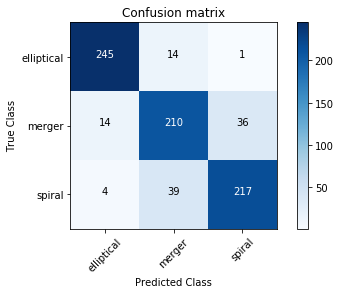

In [26]:
import numpy as np
import itertools
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
#from support_functions import generate_features_targets, plot_confusion_matrix, calculate_accuracy

def calculate_accuracy(predicted_classes, actual_classes, ):
    return sum(actual_classes[:] == predicted_classes[:]) / len(actual_classes)


def generate_features_targets(data):
    output_targets = np.empty(shape=(len(data)), dtype='<U20')
    output_targets[:] = data['class']

    input_features = np.empty(shape=(len(data), 13))
    input_features[:, 0] = data['u-g']
    input_features[:, 1] = data['g-r']
    input_features[:, 2] = data['r-i']
    input_features[:, 3] = data['i-z']
    input_features[:, 4] = data['ecc']
    input_features[:, 5] = data['m4_u']
    input_features[:, 6] = data['m4_g']
    input_features[:, 7] = data['m4_r']
    input_features[:, 8] = data['m4_i']
    input_features[:, 9] = data['m4_z']
    input_features[:, 10] = data['petroR50_u'] / data['petroR90_u']
    input_features[:, 11] = data['petroR50_r'] / data['petroR90_r']
    input_features[:, 12] = data['petroR50_z'] / data['petroR90_z']

    return input_features, output_targets


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')


def rf_predict_actual(data, n_estimators):
  features, targets = generate_features_targets(data)
  rfc = RandomForestClassifier(n_estimators=n_estimators)
  predictions = cross_val_predict(rfc, features, targets, cv=10)
  return (predictions, data['class'])


if __name__ == "__main__":
  data = np.load('galaxy_catalogue.npy')

  # get the predicted and actual classes
  number_estimators = 50              # Number of trees
  predicted, actual = rf_predict_actual(data, number_estimators)

  # calculate the model score using your function
  accuracy = calculate_accuracy(predicted, actual)
  print("Accuracy score:", accuracy)

  # calculate the models confusion matrix using sklearns confusion_matrix function
  class_labels = list(set(actual))
  model_cm = confusion_matrix(y_true=actual, y_pred=predicted, labels=class_labels)

  # plot the confusion matrix using the provided functions.
  plt.figure()
  plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
  plt.show()